# (v) Classifier Chain
Classifier chains (see ClassifierChain) are a way of combining a number of binary classifiers into a single multi-label model that is capable of exploiting correlations among targets.
For a multi-label classification problem with N classes, N binary classifiers are assigned an integer between 0 and N-1. These integers define the order of models in the chain. Each classifier is then fit on the available training data plus the true labels of the classes whose models were assigned a lower number.
When predicting, the true labels will not be available. Instead the predictions of each model are passed on to the subsequent models in the chain to be used as features.
Clearly the order of the chain is important. The first model in the chain has no information about the other labels while the last model in the chain has features indicating the presence of all of the other labels. In general one does not know the optimal ordering of the models in the chain so typically many randomly ordered chains are fit and their predictions are averaged together.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
data = data.drop(['RecordID'], axis=1)

d1 = dict(zip(list(dict(data['Family'].value_counts()).keys()), list(np.arange(4))))
d2 = dict(zip(list(dict(data['Genus'].value_counts()).keys()), list(np.arange(8))))
d3 = dict(zip(list(dict(data['Species'].value_counts()).keys()), list(np.arange(10))))

for i in range(data.shape[0]):
    data.loc[i, 'Family'] = d1.get(data.loc[i, 'Family'])
    data.loc[i, 'Genus'] = d2.get(data.loc[i, 'Genus'])
    data.loc[i, 'Species'] = d3.get(data.loc[i, 'Species'])

train_data, test_data = train_test_split(data, test_size = 0.3)

train_features = train_data.iloc[:,:-3]
test_features = test_data.iloc[:,:-3]

train_total_label = train_data[['Family', 'Genus', 'Species']]
test_total_label = test_data[['Family', 'Genus', 'Species']]

data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0,0,2
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0,0,2
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0,0,2
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0,0,2
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0,0,2
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,0.055242,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,0,0,2
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,0.064853,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,0,0,2
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,0.075654,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,0,0,2
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.032167,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,0,0,2
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,0.053436,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,0,0,2


## Gaussian kernal SVM 

In [8]:
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def ham_loss(y_true, y_pred):
    return np.sum(np.not_equal(y_true, y_pred))/float(y_true.size)

C_range = np.logspace(-1, 4, 6)
gamma_range = np.arange(0.1, 3.1, 0.1)
score = make_scorer(ham_loss, greater_is_better=False)
param_grid = dict(base_estimator__gamma=gamma_range, base_estimator__C=C_range)
clf_chain = ClassifierChain(SVC(kernel='rbf', decision_function_shape='ovr', random_state=42))
grid = GridSearchCV(clf_chain, param_grid=param_grid, scoring = score, cv=10)
grid.fit(train_data, train_total_label.values)
print("The best parameters are %s with best hamming loss of %0.7f"
      % (grid.best_params_, -grid.best_score_))

The best parameters are {'base_estimator__C': 0.1, 'base_estimator__gamma': 0.1} with best hamming loss of -0.0000000


## L1-penalized SVM

In [9]:
from sklearn.svm import LinearSVC
C_range = np.logspace(-1, 4, 6)
param_grid = dict(base_estimator__C=C_range)
clf_chain = ClassifierChain(LinearSVC(penalty='l1', dual=False, multi_class='ovr', random_state=42))
grid2 = GridSearchCV(clf_chain, param_grid=param_grid, scoring = score, cv=10)
grid2.fit(train_data, train_total_label.values)
print("The best parameters are %s with best hamming loss of %0.7f"
      % (grid2.best_params_, -grid2.best_score_))

The best parameters are {'base_estimator__C': 0.1} with best hamming loss of 0.0039714


## L1 penalized SVM with SMOTE 

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
C_range = np.logspace(-1, 4, 6)
cv_ham = []
cv_avg_ham = []
column = train_total_label.values.T

def cal_avg(num):
    return sum(num) / len(num)

for c in C_range:
    kf = KFold(n_splits=10)

    for train_index, test_index in kf.split(train_features):
        svc1 = LinearSVC(penalty='l1', dual=False, multi_class='ovr', random_state=42)
        svc2 = LinearSVC(penalty='l1', dual=False, multi_class='ovr', random_state=42)
        svc3 = LinearSVC(penalty='l1', dual=False, multi_class='ovr', random_state=42)
        
        sm = SMOTE(random_state=42)
        
        x_res1, y_res1 = sm.fit_sample(train_features.iloc[train_index,:], train_data['Family'].iloc[train_index])
        y_pred1 = svc1.fit(x_res1, y_res1).predict(train_features.iloc[test_index,:])
        train_features.loc[:, 'fam'] = pd.Series(column[0,:], index = train_features.index)
        
        x_res2, y_res2 = sm.fit_sample(train_features.iloc[train_index,:], train_data['Genus'].iloc[train_index])
        y_pred2 = svc2.fit(x_res2, y_res2).predict(train_features.iloc[test_index,:])
        train_features.loc[:, 'gen'] = pd.Series(column[1,:], index = train_features.index)
        
        x_res3, y_res3 = sm.fit_sample(train_features.iloc[train_index,:], train_data['Species'].iloc[train_index])
        y_pred3 = svc3.fit(x_res3, y_res3).predict(train_features.iloc[test_index,:])
        
        
        y_true1 = train_data['Family'].iloc[test_index]
        y_true2 = train_data['Genus'].iloc[test_index]
        y_true3 = train_data['Species'].iloc[test_index]        
        
        y_true = pd.concat([y_true1, y_true2, y_true3], axis=1)
        y_pred = np.array([y_pred1, y_pred2, y_pred3]).T
        
        cv_ham.append(ham_loss(y_true.values, y_pred))
        
    cv_avg_ham.append(cal_avg(cv_ham))
min_ham = min(cv_avg_ham)
best_c = C_range[cv_avg_ham.index(min_ham)]
print('The best number of penalty parameter C chosen by cross-validation is %.4f' % best_c)
print('Hamming loss:', min_ham)

The best number of penalty parameter C chosen by cross-validation is 10000.0000
Hamming loss: 0.009851889544566813


## Research how confusion matrices, precision, recall, ROC, and AUC are defined for multi-label classification and compute them for the classifiers you trained in above.
We compute each of these metrics for each label separately.
Note that AUC is reported inside the legends of the ROC curves.

In [34]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
train_features=train_features.drop(['fam', 'gen'],axis=1)

moc = MultiOutputClassifier(SVC(kernel='rbf', decision_function_shape='ovr', C=0.1, gamma=0.1, probability = True, random_state=42))
y_pred = moc.fit(train_features, train_total_label).predict(test_features)

print('For Family label:')
print(classification_report(test_total_label['Family'], y_pred[:,0]))
print('Confusion matrix: \n', confusion_matrix(test_total_label['Family'], y_pred[:,0]))

print('For Genus label:')
print(classification_report(test_total_label['Family'], y_pred[:,1]))
print('Confusion matrix: \n', confusion_matrix(test_total_label['Genus'], y_pred[:,1]))

print('For Species label:')
print(classification_report(test_total_label['Species'], y_pred[:,2]))
print('Confusion matrix: \n', confusion_matrix(test_total_label['Species'], y_pred[:,2]))

For Family label:
             precision    recall  f1-score   support

          0       0.86      0.95      0.90      1308
          1       0.83      0.86      0.85       661
          2       0.79      0.15      0.25       171
          3       0.00      0.00      0.00        19

avg / total       0.84      0.85      0.83      2159

Confusion matrix: 
 [[1242   60    6    0]
 [  91  569    1    0]
 [ 106   39   26    0]
 [   2   17    0    0]]
For Genus label:
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      1308
          1       0.84      0.81      0.83       661
          2       0.79      0.42      0.54       171
          3       0.00      0.00      0.00        19

avg / total       0.84      0.85      0.84      2159

Confusion matrix: 
 [[1213    5    7    0    0    0    0    0]
 [   8  466    0    0    0    0    0    0]
 [  96    4   71    0    0    0    0    0]
 [  89    1   12    0    0    0    0    0]
 [   8   75    0  

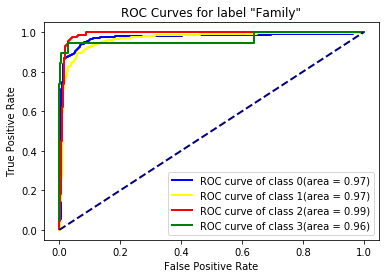

In [23]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

moc = MultiOutputClassifier(SVC(kernel='rbf', decision_function_shape='ovr', C=0.1, gamma=0.1, probability = True, random_state=42))
moc = moc.fit(train_features, train_total_label)
y_score = moc.predict_proba(test_features)

y_test = label_binarize(test_total_label['Family'], classes=[0,1,2,3])
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], np.array(y_score[0])[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue','yellow','red','green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0}(area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for label "Family"')
plt.legend()

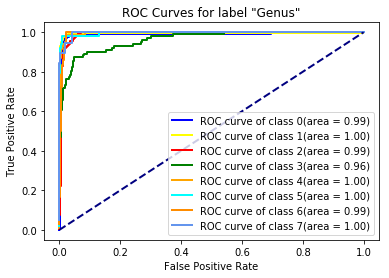

In [26]:
y_test = label_binarize(test_total_label['Genus'], classes=[0,1,2,3,4,5,6,7])
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], np.array(y_score[1])[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue','yellow','red','green','orange','aqua','darkorange','cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0}(area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for label "Genus"')
plt.legend()

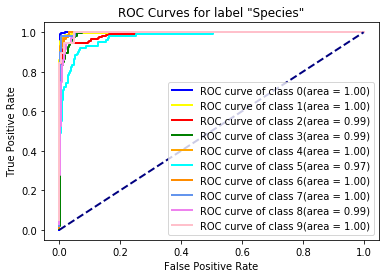

In [27]:
y_test = label_binarize(test_total_label['Species'], classes=[0,1,2,3,4,5,6,7,8,9])
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], np.array(y_score[2])[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue','yellow','red','green','orange','aqua','darkorange','cornflowerblue','violet','pink']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0}(area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for label "Species"')
plt.legend()